In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [22]:
df = pd.read_csv("/kaggle/input/urdu-news-data/description.csv",encoding='utf-8',engine='python')
df['Description'] = df['Description'].astype(str)
df = df.dropna()
data_sample = df.sample(n=25000,random_state=35)

In [23]:
stop_word_list = []
with open("/kaggle/input/urdu-stop-word/stopword.txt") as fin:
    for i in fin:
        stop_word_list.append(i.strip())
fin.close()

data_sample['Description']=data_sample['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_word_list]))

pattern = r'[a-zA-Z0-9!?:;"(,)]'
data_sample['Description']=data_sample['Description'].apply(lambda x: re.sub(pattern,'',x))

In [24]:
categories = data_sample['Category'].unique()
categories

array(['science', 'world', 'neighbour', 'entertainment', 'sports',
       'pakistan', 'election'], dtype=object)

In [25]:
data_sample.head(10)

,Description,Category
110469,درجہ حرارت میں تیزی سے تبدیلیاں فون لیے واقعی ...,science
110460,ڈاکٹر روز ’جب آپ اپنی بیٹری چارج کر ایسے میں ا...,science
174342,بعد میں ایمازون سٹور نیٹ ورک میں توسیع لیے اس ...,world
117095,مسٹر سوروچینسکی ’لوگوں جب اپنی خریداریاں ہمارے...,science
43386,پرکاش ہیـجڈے ابھینو کالج میں قاتلوں کا ہم جماع...,neighbour
120895,مصنوعی ذہانت وجہ سے ’ کروڑ نوکریاں ختم سکتی,science
6671,خرم زبیر نے لکھا ’جاوید اختر برصغیر میں ادبی ش...,entertainment
121197,میر قاسم نے جام فیروز کو راہ سجھائی چچا صلاح ا...,science
153060,بی بی سی سوال جواب ماہرین کا کہنا تھا پچھلی دہ...,world
112679,ڈاکٹر سردار سرفراز مئی میں کم از کم بارشوں تین...,science


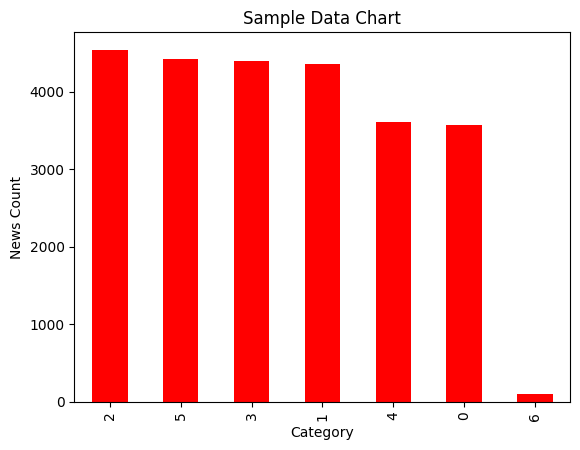

In [26]:
catergory_map = {"pakistan":0,"world":1,"entertainment":2,"science":3,"sports":4,"neighbour":5,"election":6}
counts = data_sample['Category'].map(catergory_map).value_counts()
counts.plot(kind="bar",color="red")

plt.xlabel('Category')
plt.ylabel('News Count')
plt.title("Sample Data Chart")
plt.show()

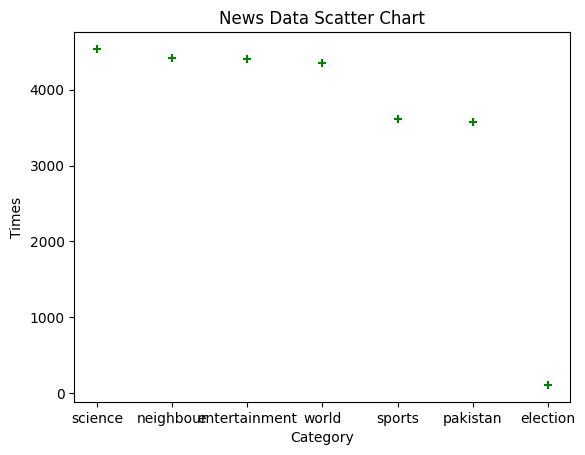

In [27]:
y_label = ["science","neighbour","entertainment","world","sports","pakistan","election"]
plt.title("News Data Scatter Chart")
plt.xlabel('Category')
plt.ylabel('Times')
plt.scatter(y_label,counts,color="green",marker="+")
plt.show()

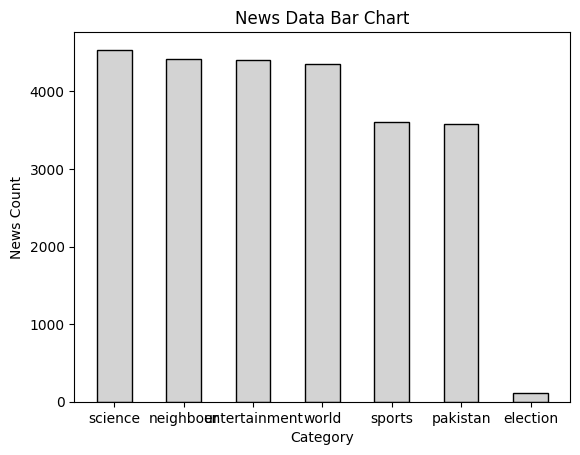

In [28]:
plt.bar(y_label,counts,fc="lightgray",ec="black",width = 0.5)
# plt.figure(figsize=(2,3))
plt.xlabel('Category')
plt.ylabel('News Count')
plt.title("News Data Bar Chart")
plt.show()

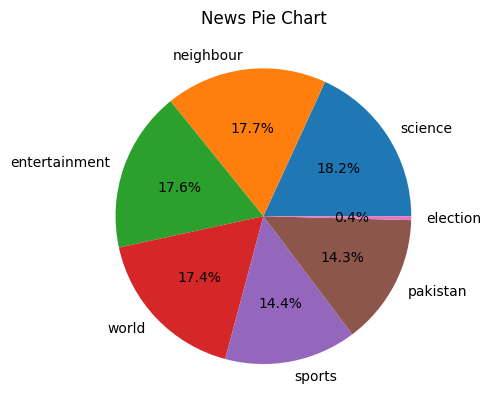

<Figure size 640x480 with 0 Axes>

In [29]:
plt.title("News Pie Chart")
plt.pie(counts,labels=y_label,autopct="%0.1f%%")
plt.show()
plt.savefig("News_Pie_chart.jpg")

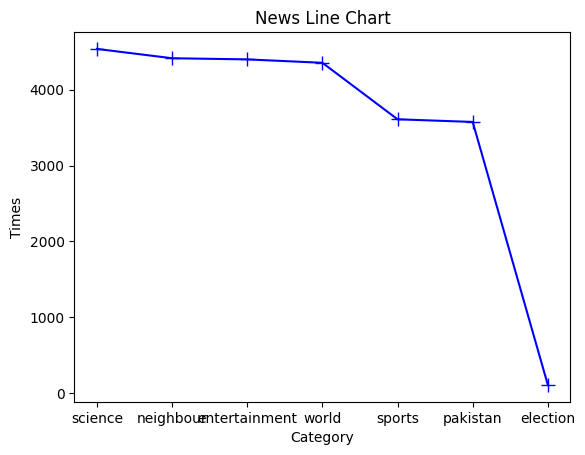

In [30]:
plt.title("News Line Chart")
plt.plot(y_label,counts,color='blue',marker='+',markerfacecolor='green',markersize=10)
plt.xlabel('Category')
plt.ylabel('Times')
plt.show()

In [31]:
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(data_sample['Description'])
y = data_sample['Category']
print(x_tfidf)

  (0, 27584)	0.07998081058775218
  (0, 4487)	0.18946960645772581
  (0, 3627)	0.20983364186131245
  (0, 23765)	0.07225759677215259
  (0, 6656)	0.16805353239102053
  (0, 26603)	0.3181478504178752
  (0, 20858)	0.22238997748552805
  (0, 977)	0.07556452849302
  (0, 4110)	0.2955211287612918
  (0, 11947)	0.37629287113509735
  (0, 7821)	0.23678512431493906
  (0, 19446)	0.24813968926622484
  (0, 15769)	0.10290546422035263
  (0, 14511)	0.21810194185776094
  (0, 5685)	0.2873048458563209
  (0, 12462)	0.13171517652823592
  (0, 6470)	0.2572410812036072
  (0, 18263)	0.10901886092237327
  (0, 7536)	0.27216137687588754
  (0, 8236)	0.25898891568265303
  (1, 6559)	0.13139054596303046
  (1, 26069)	0.21638556338739737
  (1, 10322)	0.11745216101079828
  (1, 27260)	0.13576777655352834
  (1, 27580)	0.07847832158982529
  :	:
  (24999, 5632)	0.17196729572971367
  (24999, 26799)	0.11584158098461185
  (24999, 3257)	0.34147205081187604
  (24999, 5448)	0.16129670385880943
  (24999, 13114)	0.14875156289785876
  (249

In [32]:
#Logistic Regression
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.2,random_state=35)
classifier = LogisticRegression(max_iter=25000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=25000)

In [33]:
y_pred = classifier.predict(x_test)
report = classification_report(y_test,y_pred,zero_division=0)
print(report)

               precision    recall  f1-score   support

     election       0.00      0.00      0.00        21
entertainment       0.64      0.73      0.68       922
    neighbour       0.45      0.43      0.44       865
     pakistan       0.59      0.50      0.54       713
      science       0.43      0.48      0.45       864
       sports       0.83      0.71      0.77       770
        world       0.49      0.53      0.51       845

     accuracy                           0.56      5000
    macro avg       0.49      0.48      0.48      5000
 weighted avg       0.57      0.56      0.56      5000



In [34]:
#Support Vector Machine
# x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.5,random_state=4)
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [35]:
y_pred = clf.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

               precision    recall  f1-score   support

     election       0.00      0.00      0.00        21
entertainment       0.68      0.67      0.68       922
    neighbour       0.43      0.43      0.43       865
     pakistan       0.59      0.47      0.52       713
      science       0.42      0.52      0.46       864
       sports       0.83      0.72      0.77       770
        world       0.48      0.51      0.50       845

     accuracy                           0.55      5000
    macro avg       0.49      0.48      0.48      5000
 weighted avg       0.57      0.55      0.56      5000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#K-Nearest Neighbors
# x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.5,random_state=4)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
y_pred = neigh.predict(x_test)
report = classification_report(y_test,y_pred,zero_division=0)
print(report)

               precision    recall  f1-score   support

     election       0.25      0.05      0.08        21
entertainment       0.18      0.98      0.31       922
    neighbour       0.38      0.00      0.01       865
     pakistan       0.50      0.00      0.01       713
      science       0.15      0.01      0.02       864
       sports       1.00      0.01      0.01       770
        world       0.50      0.00      0.00       845

     accuracy                           0.18      5000
    macro avg       0.42      0.15      0.06      5000
 weighted avg       0.43      0.18      0.06      5000



In [38]:
# Decision Tree
# x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.5,random_state=4)
tree = tree.DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = tree.predict(x_test)
report = classification_report(y_test,y_pred,zero_division=0)
print(report)

               precision    recall  f1-score   support

     election       0.00      0.00      0.00        21
entertainment       0.48      0.48      0.48       922
    neighbour       0.26      0.28      0.27       865
     pakistan       0.31      0.32      0.31       713
      science       0.25      0.25      0.25       864
       sports       0.61      0.56      0.59       770
        world       0.30      0.29      0.30       845

     accuracy                           0.36      5000
    macro avg       0.32      0.31      0.31      5000
 weighted avg       0.37      0.36      0.36      5000



In [40]:
#Random Forest Classifier
# x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.5,random_state=4)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [41]:
y_pred = tree.predict(x_test)
report = classification_report(y_test,y_pred,zero_division=1)
print("Random Forest Classifier")
print(report)

Random Forest Classifier
               precision    recall  f1-score   support

     election       0.00      0.00      0.00        21
entertainment       0.48      0.48      0.48       922
    neighbour       0.26      0.28      0.27       865
     pakistan       0.31      0.32      0.31       713
      science       0.25      0.25      0.25       864
       sports       0.61      0.56      0.59       770
        world       0.30      0.29      0.30       845

     accuracy                           0.36      5000
    macro avg       0.32      0.31      0.31      5000
 weighted avg       0.37      0.36      0.36      5000

